In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Data

In [3]:
#rr = pd.read_csv("../spsdata/roadrunner.csv")
#clean = rr[rr["round"] != "warmup"]
#with open("../spsdata/all.csv", "w") as f:
#    clean.to_csv(f, index=None, header=True)

In [20]:
clean = pd.read_csv("../spsdata/all.csv")
clean = clean.round({"age_precise": 0})

### Cleaner Data

In [44]:
#test = clean.drop(columns=["index_runner","side_runner","square_runner","python_tijd","spel","permutation","round","level","times_level_played_before","snelheid","mabc_percentile_score"])
#test = test[["ID","age_precise","gender","acc","ax_f","ay_f","az_f","costheta","jerk","label"]]
#with open("../spsdata/test_all.csv", "w") as f:
#    test.to_csv(f, header=True, index=None)

In [45]:
#test = pd.read_csv("../spsdata/test_all.csv")
#df = pd.DataFrame(dict((col,[]) for col in list(test)))
#for i in test.ID.unique():
#    lis = []
#    for column in list(test):
#        lis.append(test[test.ID == i][column].mean())
#    row = pd.DataFrame([lis], columns=list(test))
#    df = df.append(row, ignore_index = True)
#df = df[["ID","age_precise","gender","acc","ax_f","ay_f","az_f","costheta","jerk","label"]]
#with open('../spsdata/test.csv', 'w') as f:
#        df.to_csv(f, header=True, index=None)

In [46]:
#test = pd.read_csv("../spsdata/test_all.csv")
#new = test.drop(columns=["gender","age_precise"])
#new = new[["ID","acc","ax_f","ay_f","az_f","costheta","jerk","label"]]
#with open("../spsdata/new_all.csv", "w") as f:
#    new.to_csv(f, header=True, index=None)

In [47]:
#test = pd.read_csv("../spsdata/test.csv")
#new = test.drop(columns=["gender","age_precise"])
#new = new[["ID","acc","ax_f","ay_f","az_f","costheta","jerk","label"]]
#with open("../spsdata/new.csv", "w") as f:
#    new.to_csv(f, header=True, index=None)

### Normalized Data

In [6]:
data = pd.read_csv("new.csv")
cols = ["acc", "ax_f", "ay_f", "az_f", "costheta", "jerk"]
for x in cols:
    data[x] = data[x].abs() / data[x].abs().mean()
with open("normalized.csv", "w") as f:
    data.to_csv(f, index=None, header=True)

## Means and Variance

In [6]:
noprobs = clean[clean["mabc_binary_score"] == 0]

In [7]:
mjerk0 = noprobs["jerk"].mean()
macc0 = noprobs["acc"].mean()
mcostheta0 = noprobs["costheta"].mean()
vjerk0 = noprobs["jerk"].var()
vacc0 = noprobs["acc"].var()
vcostheta0 = noprobs["costheta"].var()
print("Kids with no fine motor skills problems:\n")
print("Mean of jerk: {}".format(mjerk0))
print("Mean of acceleration: {}".format(macc0))
print("Mean of costheta: {}".format(mcostheta0))
print("Variance of jerk: {}".format(vjerk0))
print("Variance of acceleration: {}".format(vacc0))
print("Variance of costheta: {}".format(vcostheta0))

Kids with no fine motor skills problems:

Mean of jerk: 1.57260308877
Mean of acceleration: 9.76735986693
Mean of costheta: 0.826624670792
Variance of jerk: 3.81560658853
Variance of acceleration: 0.175539397098
Variance of costheta: 0.045394401657


In [8]:
probs = clean[clean["mabc_binary_score"] == 1]

In [9]:
mjerk1 = probs["jerk"].mean()
macc1 = probs["acc"].mean()
mcostheta1 = probs["costheta"].mean()
vjerk1 = probs["jerk"].var()
vacc1 = probs["acc"].var()
vcostheta1 = probs["costheta"].var()
print("Kids with fine motor skills problems:\n")
print("Mean of jerk: {}".format(mjerk1))
print("Mean of acceleration: {}".format(macc1))
print("Mean of costheta: {}".format(mcostheta1))
print("Variance of jerk: {}".format(vjerk1))
print("Variance of acceleration: {}".format(vacc1))
print("Variance of costheta: {}".format(vcostheta1))

Kids with fine motor skills problems:

Mean of jerk: 1.63608224209
Mean of acceleration: 9.75603166279
Mean of costheta: 0.773176191018
Variance of jerk: 4.59023885092
Variance of acceleration: 0.186154929647
Variance of costheta: 0.0764082927118


## Plots

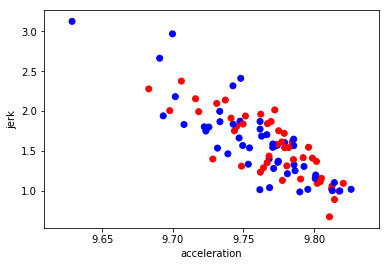

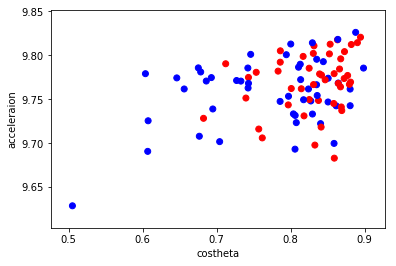

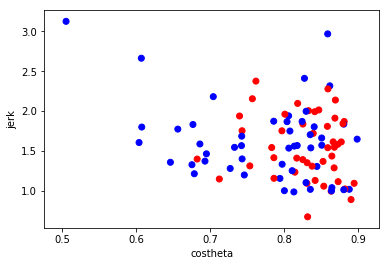

In [12]:
acceleration = []
jerk = []
costheta = []
labels = []
for i in rr.ID.unique():
    acceleration.append(clean[clean.ID == i]["acc"].mean())
    jerk.append(clean[clean.ID == i]["jerk"].mean())
    costheta.append(clean[clean.ID == i]["costheta"].mean())
    labels.append(clean[clean.ID == i]["mabc_binary_score"].mean())
plt.scatter(acceleration, jerk, c=["red" if label == 0 else "blue" for label in labels])
plt.xlabel("acceleration")
plt.ylabel("jerk")
plt.show()
plt.scatter(costheta, acceleration, c=["red" if label == 0 else "blue" for label in labels])
plt.xlabel("costheta")
plt.ylabel("acceleraion")
plt.show()
plt.scatter(costheta, jerk, c=["red" if label == 0 else "blue" for label in labels])
plt.xlabel("costheta")
plt.ylabel("jerk")
plt.show()

## Support Vector Machine

In [13]:
from sklearn.svm import SVC
import random

split = 0.7
lis = []
for i in clean.ID.unique():
    elem = []
    elem.append(clean[clean.ID == i]["acc"].mean())
    elem.append(clean[clean.ID == i]["jerk"].mean())
    elem.append(clean[clean.ID == i]["costheta"].mean())
    elem.append(clean[clean.ID == i]["mabc_binary_score"].mean())
    lis.append(elem)
    
random.shuffle(lis)
z = int(0.7*len(lis))
val = lis[:z]
test = lis[z:]

xval = []
yval = []
for item in val:
    xval.append(item[:-1])
    yval.append(item[-1])
xtes = []
ytes = []
for item in test:
    xtes.append(item[:-1])
    ytes.append(item[-1])

clf = SVC(gamma='scale')
clf.fit(xval, yval)  
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
k = 0
n = len(ytes)
for i in range(n):
    label = ytes[i]
    guess = clf.predict([xtes[i]])
    if label == guess:
        k += 1
print(k / float(n))

0.413793103448
